<a href="https://colab.research.google.com/github/joaovictortbm/Classificacao_de_Imagens/blob/main/ClassificacaoImagens_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Importando dataset

In [2]:
# Importando dataset cifar10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

# Tratando dados

In [3]:
# Normalizando dados previsores
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Utilizando data argumentation nos dados
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

# Criação e treinamento do modelo

In [ ]:
# Criando modelo
model = tf.keras.Sequential([
    # Camada data argumetation
    data_augmentation,

    # CAMADAS CONVOLUCIONAIS

    # Primeira Camada de convolucional
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Segunda camada  convoluçional
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Terceira camada convolucional
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),



    # Camada para achatar imagens
    tf.keras.layers.Flatten(),

    # CAMADAS OCULTAS

    # Primeira Camada oculta
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    # Segunda camada oculta
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    # Camada de saída
    tf.keras.layers.Dense(10, activation='softmax')
])

In [17]:
# Compliando modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Treinando modelo
r = model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.3366 - loss: 1.8278 - val_accuracy: 0.5196 - val_loss: 1.3217
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4905 - loss: 1.4281 - val_accuracy: 0.5520 - val_loss: 1.2582
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.5447 - loss: 1.2898 - val_accuracy: 0.5501 - val_loss: 1.2442
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.5789 - loss: 1.2031 - val_accuracy: 0.6440 - val_loss: 1.0202
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6038 - loss: 1.1397 - val_accuracy: 0.6427 - val_loss: 1.0274
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6185 - loss: 1.1002 - val_accuracy: 0.6028 - val_loss: 1.1394
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6363 - loss: 1.0484 - val_accuracy: 0.6633 - val_loss: 0.9547
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.6481 -

# Avaliações sobre o modelo

In [19]:
# Avaliando o modelo
loss, accuracy = model.evaluate(x_test, y_test)

print(f'Acurácia: {accuracy * 100:.2f}%')
print(f'Loss: {loss:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7640 - loss: 0.7010
Acurácia: 76.17%
Loss: 0.7100


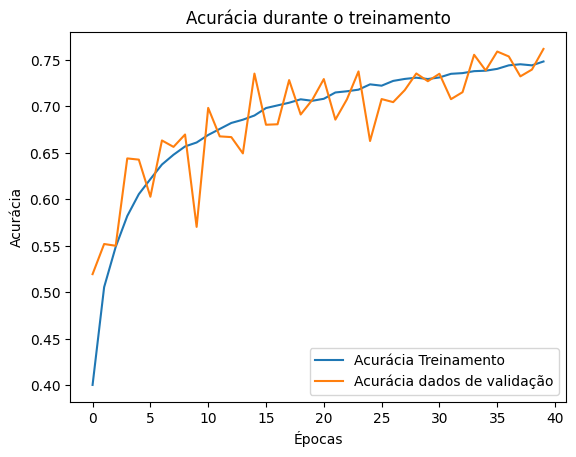

In [22]:
# Plotando grafico da acurácia por interação
plt.plot(r.history['accuracy'], label='Acurácia Treinamento')
plt.plot(r.history['val_accuracy'], label='Acurácia dados de validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

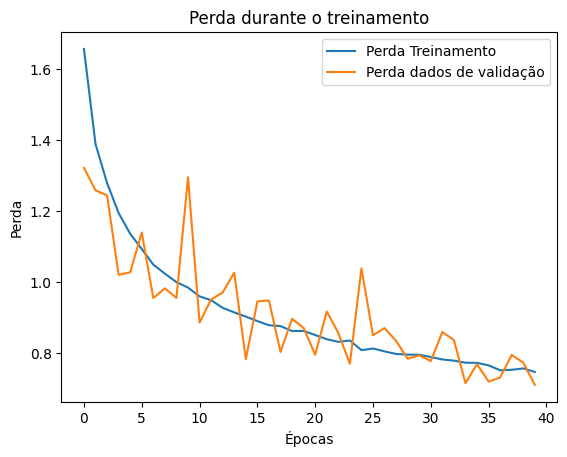

In [25]:
# Plotando grafico da perda por interação
plt.plot(r.history['loss'], label='Perda Treinamento')
plt.plot(r.history['val_loss'], label='Perda dados de validação')
plt.title('Perda durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


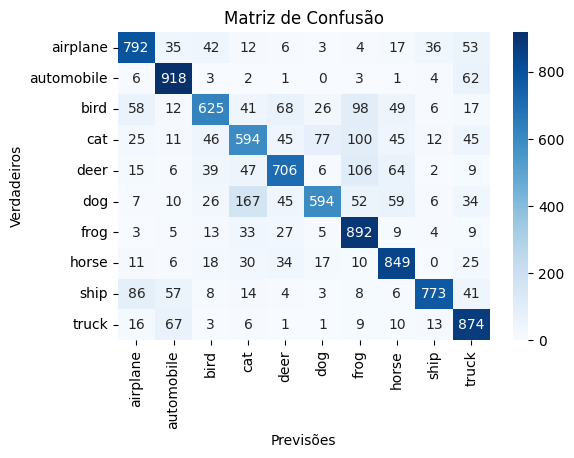

In [29]:
# Plotando matriz de confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Predição para o conjunto de teste
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)

# Gerando a matriz de confusão
cm = confusion_matrix(y_test, y_pred_classes)#

# Plotando a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = class_names, yticklabels=class_names)
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Verdadeiros')
plt.show()

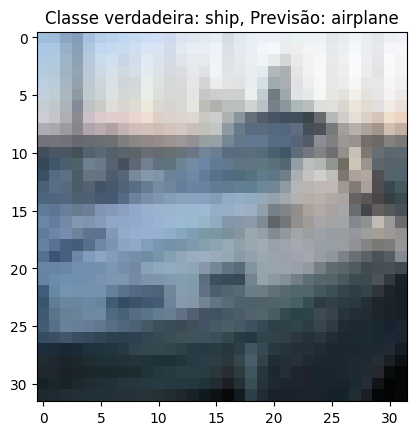

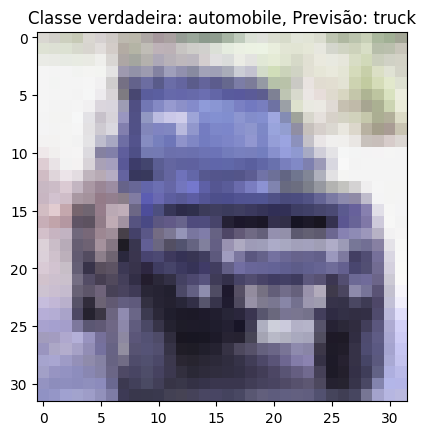

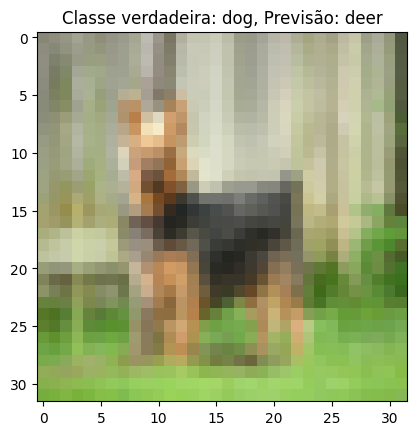

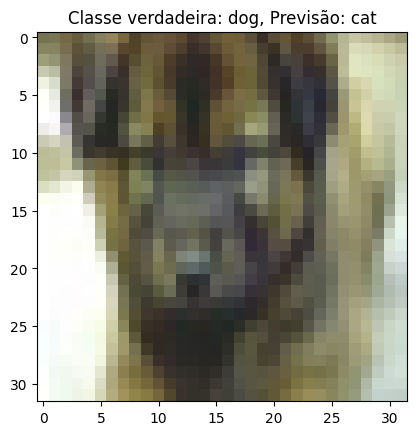

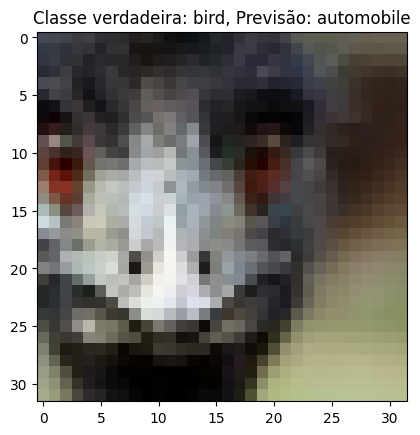

In [31]:
# Mostrando algumas previsões erradas
incorrect_indices = [i for i, (true, pred) in enumerate(zip(y_test, y_pred_classes)) if true != pred]


for idx in incorrect_indices[:5]:
    plt.imshow(x_test[idx])
    plt.title(f'Classe verdadeira: {class_names[y_test[idx][0]]}, Previsão: {class_names[y_pred_classes[idx]]}')
    plt.show()